## Exercice : 

### Origine sociale (CSP parents) vs. Choix d’études à l’Université

Quelques questions simples pour caractériser la relation :
1. Structure des filières choisies selon la CSP (profils lignes)
2. Différences/ressemblances des structures de choix selon les CSP (distance)
3. Idem – Structure des CSP des parents selon les filières (profils colonnes)
4. Associations entre CSP et FILIERES : Qui choisit quoi ? Quoi est choisi par qui ?

In [1]:
import pandas as pd
from fanalysis.ca import CA
import numpy as np

In [2]:
df = pd.read_table("data/afc_ex.txt", header=0, index_col=0)

In [3]:
print(df)

           Droit  Science  Medecine  IUT
CSP/Fil.                                
Exp.agri      80       99        65   58
Patron       168      137       208   63
Cadre.sup    470      400       876   79
Emp.         145      133       135   54
Ouvrier      166      193       127  129


In [4]:
my_ca = CA(row_labels=df.index.values, col_labels=df.columns.values,n_components=2)

In [5]:
X = df.values
n=np.sum(X)

In [6]:
my_ca.fit(X)

CA(col_labels=array(['Droit', 'Science', 'Medecine', 'IUT'], dtype=object),
   n_components=2,
   row_labels=array(['Exp.agri', 'Patron', 'Cadre.sup', 'Emp.', 'Ouvrier'], dtype=object))

In [7]:
print(my_ca.eig_[0])
print(my_ca.eig_[1])
print(my_ca.eig_[2])

[0.08231106 0.00168257]
[97.3334662  1.9896516]
[97.3334662 99.3231178]


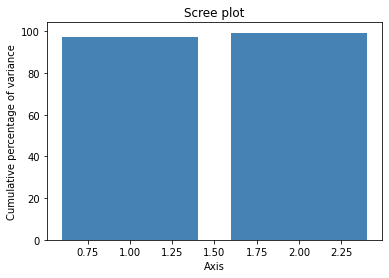

In [8]:
my_ca.plot_eigenvalues(type="cumulative")


In [9]:
#Information sur les lignes 
df_rows = my_ca.row_topandas()
print(df_rows)

           row_coord_dim1  row_coord_dim2  row_contrib_dim1  row_contrib_dim2  \
Exp.agri         0.409300       -0.025581         16.239297          3.103142   
Patron           0.023393        0.023966          0.101170          5.194893   
Cadre.sup       -0.263181       -0.015126         40.573908          6.556144   
Emp.             0.141529        0.097860          3.002494         70.223833   
Ouvrier          0.450615       -0.039309         40.083131         14.921988   

           row_cos2_dim1  row_cos2_dim2  
Exp.agri        0.987167       0.003856  
Patron          0.155557       0.163278  
Cadre.sup       0.996089       0.003290  
Emp.            0.666802       0.318797  
Ouvrier         0.992088       0.007550  


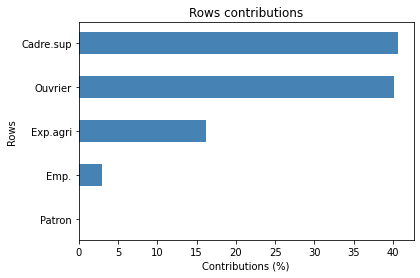

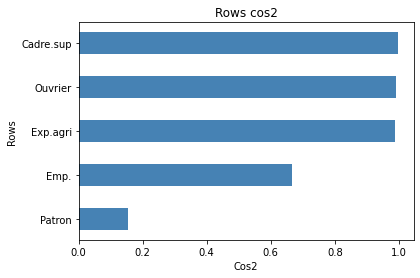

In [17]:

my_ca.plot_row_contrib(num_axis=1)## dim =1
my_ca.plot_row_contrib(num_axis=2)


my_ca.plot_row_cos2(num_axis=1)

In [11]:
#Information sur les colonnes 
df_cols = my_ca.col_topandas()
print(df_cols)

          col_coord_dim1  col_coord_dim2  col_contrib_dim1  col_contrib_dim2  \
Droit           0.028124        0.060061          0.261244         58.285261   
Science         0.160310        0.003275          7.935510          0.162003   
Medecine       -0.303205       -0.029529         41.636552         19.318997   
IUT             0.638808       -0.060803         50.166694         22.233739   

          col_cos2_dim1  col_cos2_dim2  
Droit          0.168338       0.767729  
Science        0.944570       0.000394  
Medecine       0.990315       0.009393  
IUT            0.988647       0.008957  


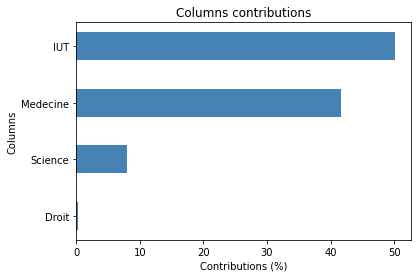

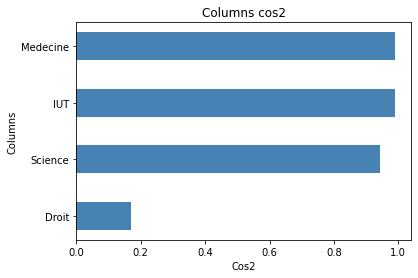

In [12]:
my_ca.plot_col_contrib(num_axis=1)
my_ca.plot_col_cos2(num_axis=1)

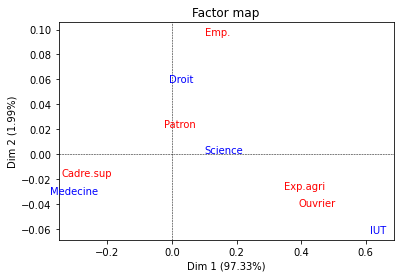

In [18]:
my_ca.mapping(num_x_axis=1, num_y_axis=2)

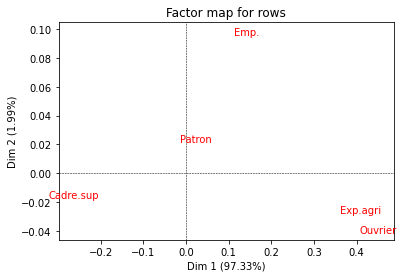

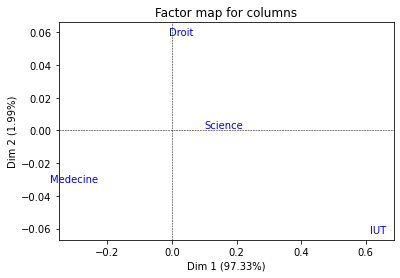

In [19]:
# Mapping des points lignes
my_ca.mapping_row(num_x_axis=1, num_y_axis=2)
# Mapping des points lignes
my_ca.mapping_col(num_x_axis=1, num_y_axis=2)

In [ ]:
## dans 2eme graphe(blue ) les elems ne sont pas corrélé entre eux , on a 4 modalité loin de centre cela
## veut dire qu'il y a une dépendance contrairement à la variable 